In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Preprocess The Data

In [2]:
# Read in the data
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
# View the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Old shape of the data
df.shape

(5110, 12)

In [5]:
# Drop unnecessary columns
preproccessed_df = df.drop(labels=['id', 'ever_married', 'work_type', 'Residence_type'], axis=1)

In [6]:
# Drop rows with missing values
preproccessed_df = preproccessed_df.dropna(axis=0)

In [7]:
# Convert categorical features to numerical features using one hot encoding
preprocessed_df = pd.get_dummies(preproccessed_df, columns=['gender', 'smoking_status'], dtype=int)

In [8]:
preprocessed_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0


In [9]:
# New shape of the data
preprocessed_df.shape

(4909, 13)

# Analyze The Data

In [10]:
# Import necesary libraries
from matplotlib import pyplot

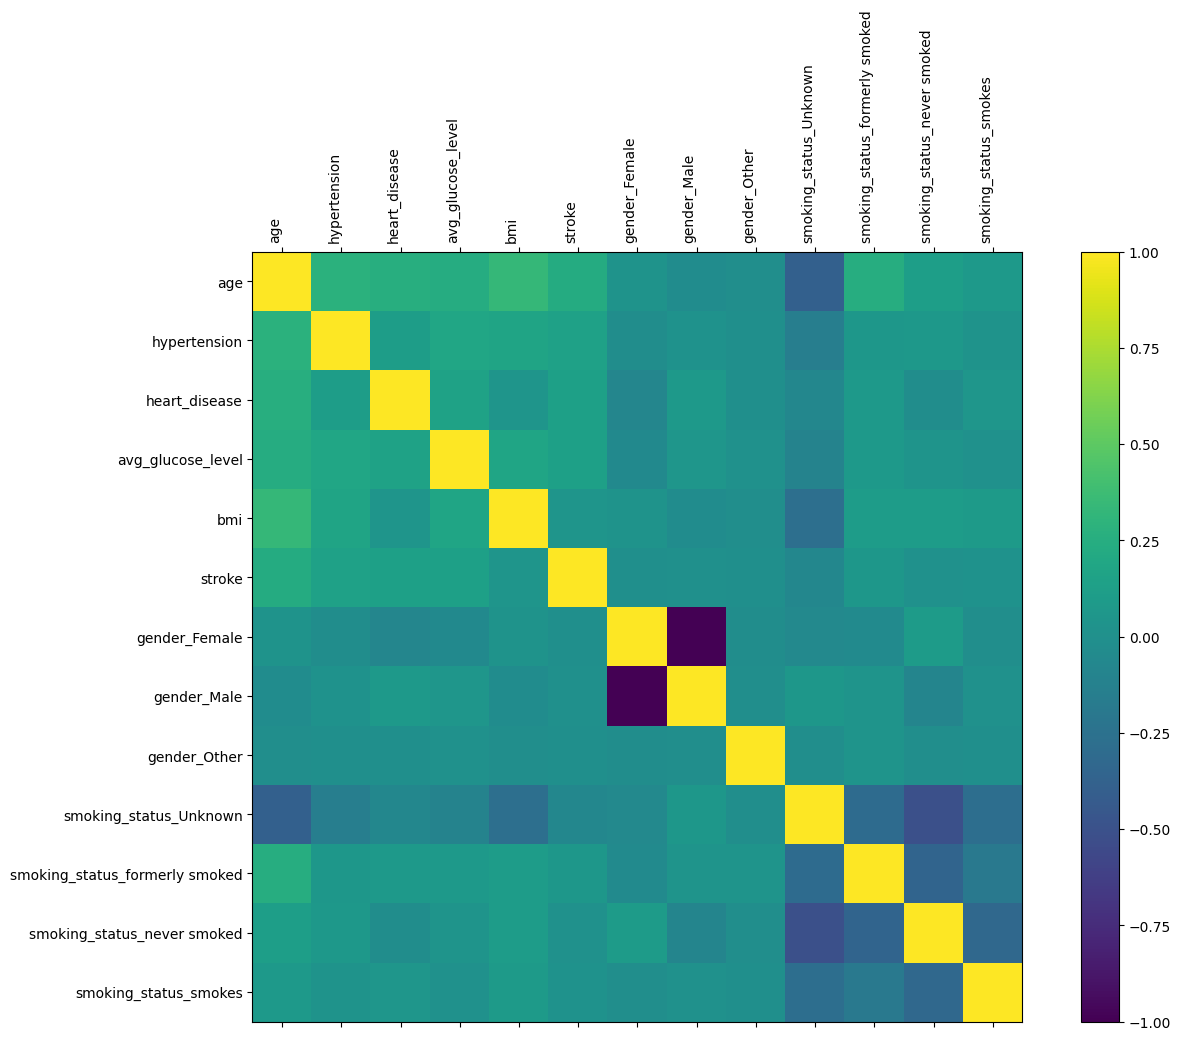

In [11]:
# Correlation matrix to see which features are related to each other
feats = preprocessed_df.columns
correlations = preprocessed_df.corr()

fig = pyplot.figure(figsize=(15, 10))
ax = fig.add_subplot()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feats)
ax.set_yticklabels(feats)

# Rotate x-axis labels for better readability
ax.set_xticklabels(feats, rotation=90, ha='right')
ax.set_yticklabels(feats)

pyplot.show()

Based off the data from the correlation matrix, we can assume that age, hypertension, heart_disease, avg_glucose_level, and smoking_status_formerly smoked had higher correlation

# Model The Data

# Evaluate The Model

# Train The Model

# Deploy The Model